# *`06_LogisticRegression`*

Logistic regression is a predictive analysis that estimates the probability of an event occurring based on a given dataset. This dataset contains both independent variables, or predictors, and their corresponding dependent variables, or responses.

* This is a classification algorithm.
* The data for Logistic regression should be linearly separable or almost linearly separable because you draw a line to perform classification.

#### The Perceptron Trick
Suppose we have a data as shown below.
<IMAGE>

In Logistic Regression as well you try to draw a line to separate two classes. The equation line in 2D is given for Logistic Regression is:

$$
AX_1 + BX_2 + C = 0
$$

For 3D:
\
$$
AX_1 + BX_2 + CX_3 + D = 0
$$

**Steps:**

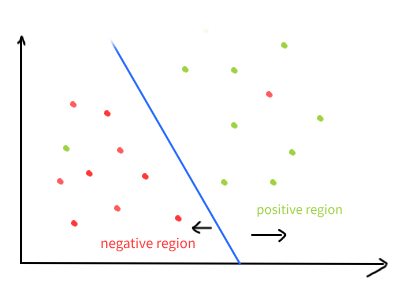


* red points (negative region)
* green points (positive region)

You start with a random line at first
A = B = 1, C = 0


1. Mark all the points lying in the positive region as green.
2. Run a loop for $n$ times.
3. Then simply select a random point.
4. Check if the point was Green or Red originally. If the point is Green you push line away from the point. If the point is Red you pull the line close to that point.
5. Repeat the process until you reach the best fit.

### How to select the Positive and Negative region?
Let's say your equation for line is:

$6x + 4y + 3 = 0$

So, points greater than equation $6x + 4y + 3 > 0$ will be positive region.
And points smaller than equation $6x + 4y + 3 < 0$ will be negative region.

### Transformations

$$
AX + BY + C = 0
$$

* $A$ is changing like this:

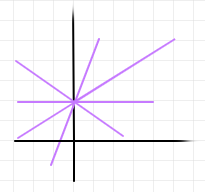

* $B$ is changing as:

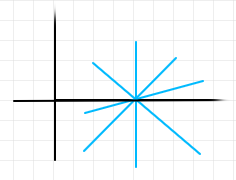

* $C$ moves:

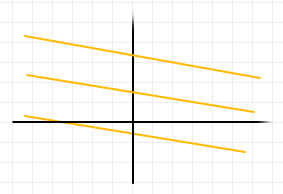

The magnitude by which the line gets pushed or pull depends on the distance of the line from the point.

**CASES**
* **case1**: Missclassified point close to line: Will **`pull`** the line slowly.
* **case2**: Missclassified point away from line: Will **`pull`** the line strongly.
* **case3**: Correctly classified point close to line: Will **`push`** the line strongly.
* **case4**: Correctly classified point away from line: Will **`push`** the line slowly.

\
**Example:**

$$w_{new} = w_{old} ++ \eta (y_i - y_{hat_i})(x_i)$$

where $y_i$ = actual,
$y_{hat_i}$ = pred,
$w_{new}$ = Updated weights,
$w_{old}$ = old

\

| actual | pred | actual - pred | $w_{new}$ |
| --- | --- | --- | --- |
| 1 | 1 | 0     | $w_o$ |
| 0 | 0 | 0     | $w_o$ |
| 1 | 0 | 0     | $w_o + \eta(x_i)$ |
| 0 | 1 | -1    | $w_o - \eta(x_i)$ |

\
We have to stop $(y_i - y_{hat_i})$ from becoming $0$.

$(y_i - y_{hat_i}) \neq 0$

$y_i$ cannot be changed since its input data. But we can change $y_{hat_i}$. We saw we calculate $y_{hat_i}$ by:

$ y_{hat} = \sum w_i x_i$

We can't be using step function since it outputs only to 1 or 0. We need to use some other function so that $y_i - y_{hat_i} \neq 0$.

Sigmoid function:
$$\sigma_{(z)} = \frac {1}{1+e^-z}$$

\
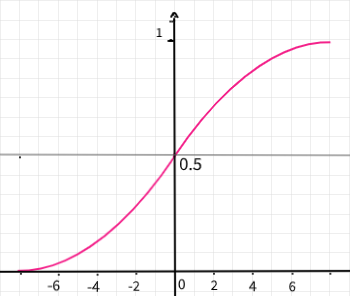

No matter how big of a number we provide, it will scale it down between 0 and 1.

$z = w_1x_1 + w_2x_2 + w_0\\
y_{hat_i} = \sigma(z)$



Sigmoid will a probabilistic interpretation of the data points.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [15]:
# Define the sigmoid function
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [25]:
# Implement the class for Logistic regression
class LogisticRegression:
  def __init__(self, learning_rate, epochs = 100):
    self.coef_ = None
    self.intercept_ = None
    self.eta = learning_rate
    self.epochs = epochs

  def fit(self, x, y):
    ones = np.ones((x.shape[0], 1))  # Create a column of ones for intercept
    x_with_ones = np.hstack((ones, x))  # Horizontally stack ones with x
    weights = np.ones(x_with_ones.shape[1])  # Initialize weights with ones

    for _ in range(self.epochs):
        idx = np.random.randint(0, x.shape[0])
        y_hat = sigmoid(np.dot(x_with_ones[idx], weights))
        weights = weights + self.eta * (y[idx] - y_hat) * x_with_ones[idx]

    self.intercept_ = weights[0]
    self.coef_ = weights[1:]

  def predict(self, x):
    return np.dot(x, self.coef_) + self.intercept_

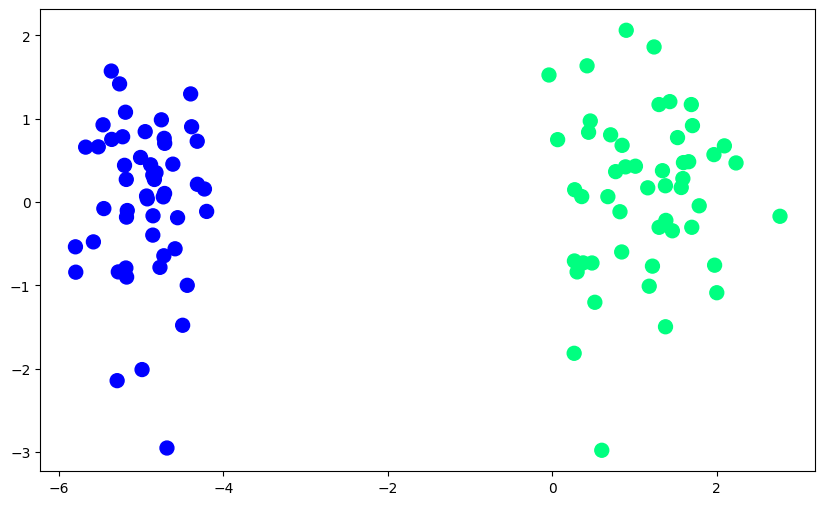

In [12]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100);

In [26]:
log_reg = LogisticRegression(learning_rate = 0.001, epochs = 1000)

log_reg.fit(X, y)

print(log_reg.coef_)
print(log_reg.intercept_)

[1.10216293 0.94187657]
1.05840934776502


In [ ]:
  def fit(self, x, y):
    ones = np.ones((x.shape[0], 1))  # Create a column of ones for intercept
    x_with_ones = np.hstack((ones, x))  # Horizontally stack ones with x
    weights = np.ones(x_with_ones.shape[1])  # Initialize weights with ones

    for _ in range(self.epochs):
        idx = np.random.randint(0, x.shape[0])
        y_hat = sigmoid(np.dot(x_with_ones[idx], weights))
        weights = weights + self.eta * (y[idx] - y_hat) * x_with_ones[idx]

In [37]:
def gd(x,y):

  ones = np.ones((x.shape[0], 1))  # Create a column of ones for intercept
  x_with_ones = np.hstack((ones, x))  # Horizontally stack ones with x
  weights = np.ones(x_with_ones.shape[1])  # Initialize weights with ones
  lr = 0.5

  for _ in range(5000):
    y_hat = sigmoid(np.dot(x_with_ones, weights))
    weights = weights + lr * ( np.dot((y - y_hat), x_with_ones) / x.shape[0])

  return weights[1:],weights[0]

In [38]:
gd(X,y)

(array([3.47974267, 0.13305072]), 5.102916648814875)